In [2]:
# References: https://github.com/dcajasn/Riskfolio-Lib/tree/master/examples

import pandas
import riskfolio as rp
import warnings
from openbb_terminal.sdk import openbb
from IPython.display import display
import matplotlib

warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

matplotlib.style.use("seaborn")

In [4]:
excel_file_path = r"../../input/portfolio_data.xlsx" # change to your input excel path
benchmark_symbol = "0820EA.KL" # change the benchmark you want, for example SPY
start_date = "2020-01-01"

In [5]:
# check transactions data
transactions_df = pandas.read_excel(excel_file_path)
transactions_df.head()

,Date,Ticker,Type,Sector,Industry,Country,Region,Price,Quantity,Fees,Premium,Investment,Side,Currency
0,2020-10-14 00:00:00,1066.KL,Stock,-,-,Malaysia,Asia,4.54,200,10,0,918.0,buy,MYR
1,2020-11-18 00:00:00,0151.KL,Stock,-,-,Malaysia,Asia,1.66,200,20,0,352.0,buy,MYR
2,2020-11-13 00:00:00,7148.KL,Stock,-,-,Malaysia,Asia,4.02,100,10,0,412.0,buy,MYR
3,6 Nov 2020,0093.KL,Stock,-,-,Malaysia,Asia,0.73,100,10,0,83.0,buy,MYR
4,2020-11-23 00:00:00,7022.KL,Stock,-,-,Malaysia,Asia,2.90,200,10,0,590.0,buy,MYR


In [6]:
# Create a Portfolio instance and load portfolio data from ".xlsx" excel file 
p = openbb.portfolio.load(transactions_file_path = excel_file_path)
p.set_benchmark(benchmark_symbol) # set benchmark

True

In [7]:
# get all the unique stock ticker list from your portfolio
tickers_list = p.tickers_list
tickers_list

['3182.KL',
 '1066.KL',
 '5099.KL',
 '0151.KL',
 '7148.KL',
 '0166.KL',
 '6998.KL',
 '7022.KL',
 '0093.KL']

In [8]:
# get current investment amount
current_invested_amount = openbb.portfolio.holdv(p).iloc[-1,:]
current_invested_amount

Ticker
3182.KL         432.000017
1066.KL        1131.999969
5099.KL         273.000008
0151.KL           0.000000
7148.KL           0.000000
0166.KL           0.000000
6998.KL           0.000000
7022.KL         294.000006
0093.KL          22.000000
Total Value    2153.000000
Name: 2023-07-28, dtype: float64

In [9]:
# get daily returns of all tickers
close_price = openbb.economy.index(indices=tickers_list, start_date=start_date).fillna("ffill")
Y = close_price.pct_change().iloc[1:,:]
Y = Y.dropna(axis="columns") # replace null values with 0% daily returns
Y

yfinance: download(show_errors=False) argument is deprecated and will be removed in future version. Do this instead to suppress error messages: logging.getLogger('yfinance').setLevel(logging.CRITICAL)


,3182.KL,1066.KL,5099.KL,0151.KL,7148.KL,0166.KL,6998.KL,7022.KL,0093.KL
Date,,,,,,,,,
2020-01-03,0.006579,0.001742,0.000000,0.015625,0.013699,0.005780,0.000000,0.000000,0.000000
2020-01-06,-0.013072,-0.001739,-0.005917,-0.007692,-0.006757,-0.022988,-0.043478,-0.038136,-0.047619
2020-01-07,-0.003311,0.033101,-0.011905,0.000000,0.074830,0.005882,0.045455,0.004405,0.050000
2020-01-08,-0.003322,-0.015177,-0.012048,-0.015504,-0.025316,-0.011696,-0.043478,-0.004386,-0.047619
2020-01-09,0.020000,-0.008562,0.030488,0.007874,0.045454,0.017751,0.045455,0.004405,0.000000
...,...,...,...,...,...,...,...,...,...
2023-07-24,0.002375,-0.003591,-0.005848,0.027027,0.000000,-0.006410,-0.066667,0.000000,-0.044444
2023-07-25,0.004739,0.018018,-0.005882,-0.013158,0.007634,0.000000,0.000000,0.000000,0.023256
2023-07-26,0.011792,0.003540,-0.005917,-0.006667,0.000000,-0.019355,0.071429,-0.100000,0.000000


In [10]:
# get benchmark return 
benchmark_rets = openbb.economy.index(indices=[benchmark_symbol], start_date=start_date).pct_change().iloc[1:,:]
benchmark_rets

,0820EA.KL
Date,
2020-01-03,0.000000
2020-01-06,0.005865
2020-01-07,-0.026239
2020-01-08,0.000000
2020-01-09,0.026946
...,...
2023-07-24,0.010239
2023-07-25,0.006757
2023-07-26,0.000000


In [11]:
port = rp.Portfolio(returns=Y)

method_mu = "hist"
method_cov ="hist"
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)


In [12]:
display(w)

,weights
3182.KL,2.046619e-08
1066.KL,1.080848e-01
5099.KL,1.272908e-08
0151.KL,3.415787e-01
7148.KL,7.017050e-02
0166.KL,2.975842e-01
6998.KL,2.349998e-02
7022.KL,1.076488e-08
0093.KL,1.590818e-01


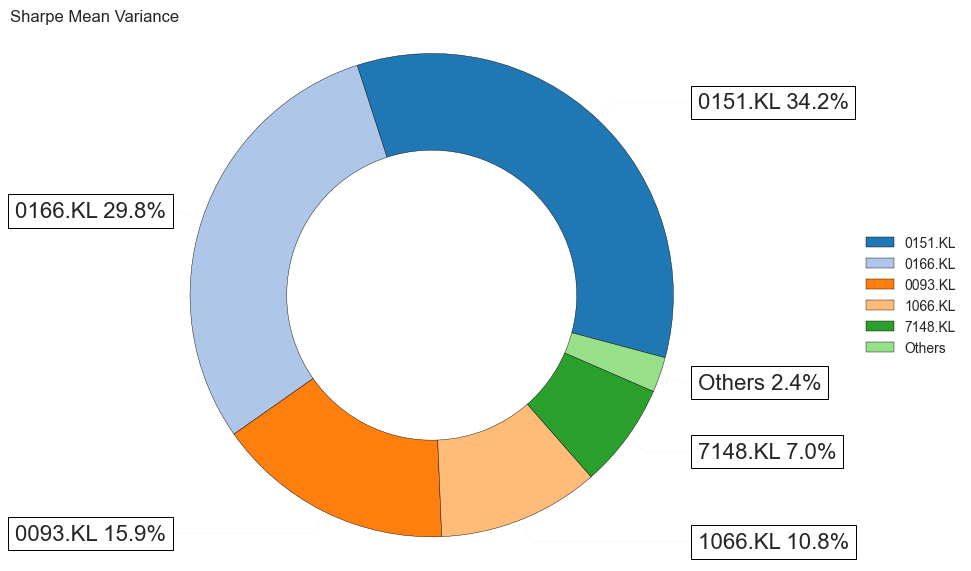

In [13]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


In [14]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,3182.KL,1066.KL,5099.KL,0151.KL,7148.KL,0166.KL,6998.KL,7022.KL,0093.KL
0,4.592406e-02,0.646912,2.749713e-09,0.019322,0.123617,0.057493,4.752741e-09,1.067325e-01,3.128742e-09
1,2.191024e-09,0.551519,9.415297e-10,0.122238,0.118775,0.166926,3.285696e-03,1.429668e-09,3.725620e-02
2,3.398179e-09,0.465139,1.562991e-09,0.164953,0.109318,0.192380,7.218347e-03,1.664924e-09,6.099086e-02
3,7.113392e-10,0.397454,3.991289e-10,0.198435,0.101898,0.212321,1.030612e-02,3.089669e-10,7.958546e-02
4,9.871481e-10,0.338241,5.475807e-10,0.227726,0.095407,0.229767,1.300721e-02,5.303240e-10,9.585221e-02


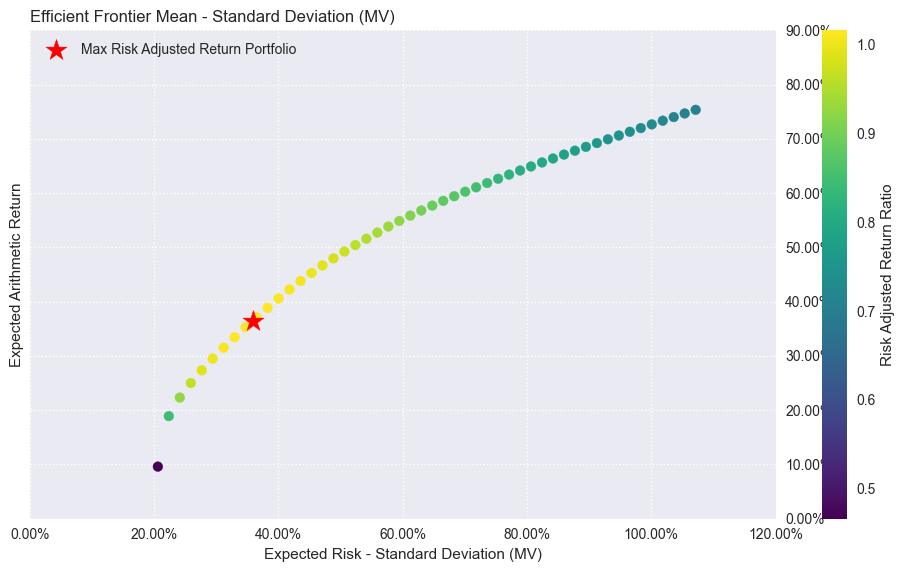

In [15]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of plot

mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05, cmap='viridis', w=w, label=label, marker='*', s=16, c='r', height=6, width=10, ax=None)

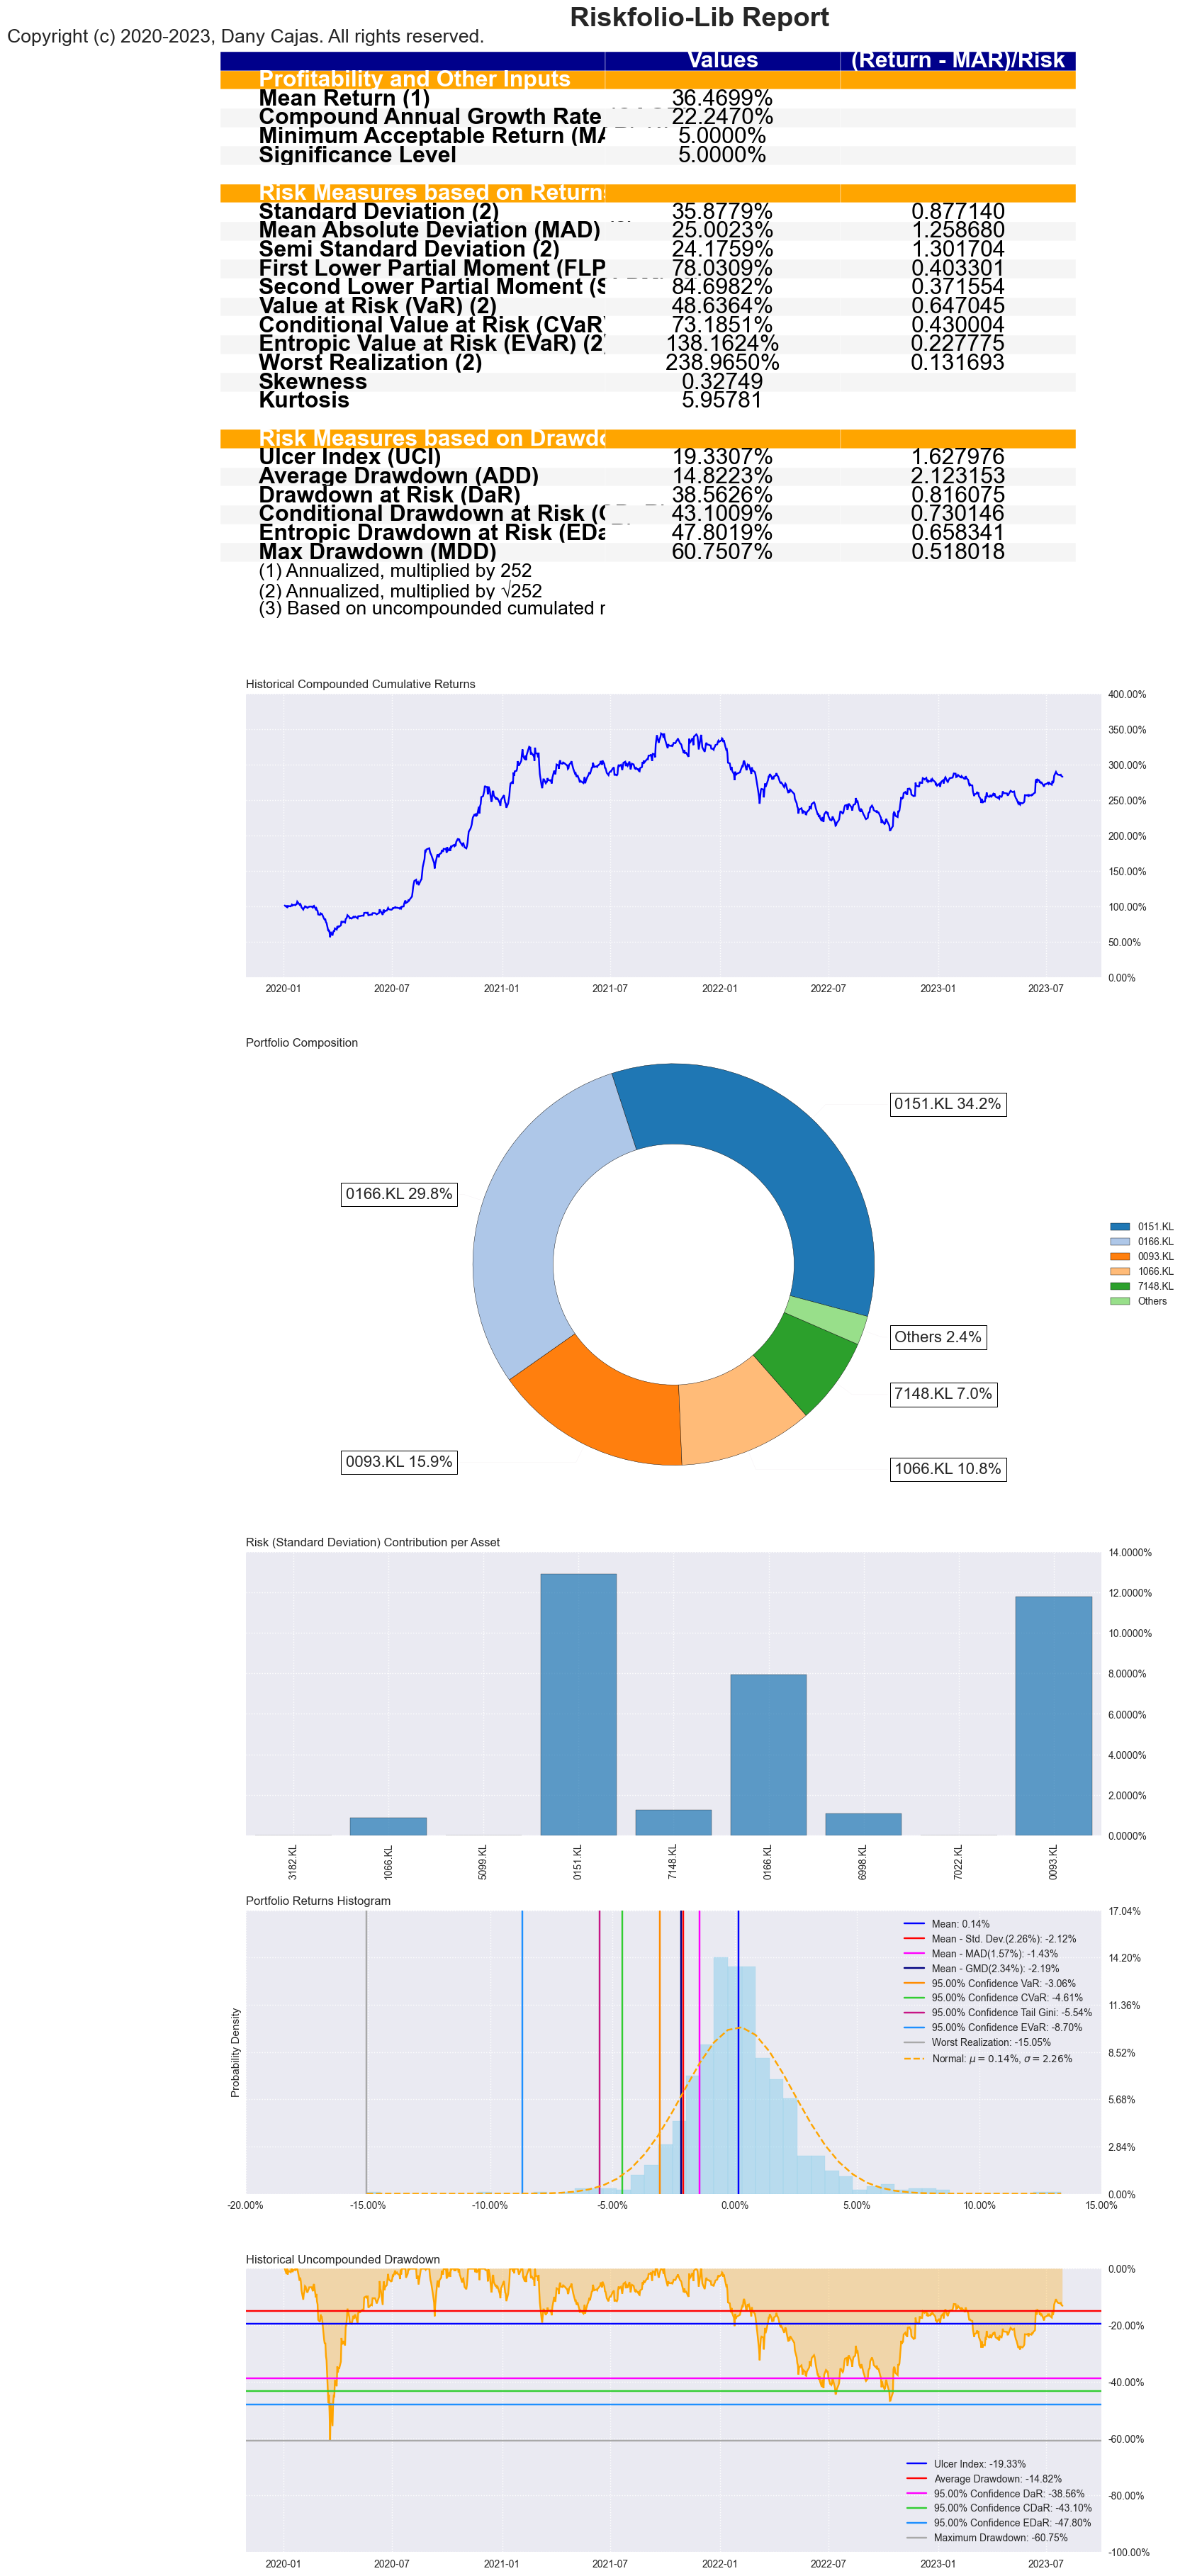

In [16]:
ax = rp.jupyter_report(returns=returns,
                       w=w,
                       rm=rm,
                       rf=0.05,
                       alpha=0.05,
                       #others=0.05,
                       nrow=25,
                       height=6,
                       width=14,
                       t_factor=252,
                       ini_days=1,
                       days_per_year=252,
                       bins=50,
                       )